# **Importing Libraries**

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import pickle
import cv2
from sklearn.model_selection import train_test_split 
from keras.utils import to_categorical
from keras.models import Sequential 
from keras.optimizers import Adam
from keras.layers import Flatten, Conv2D, MaxPooling2D, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator




/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
np.random.seed(42)

# **Label Overview**

In [3]:
df=pd.read_csv("/kaggle/input/indian-traffic-sign-dataset/Indian-Traffic Sign-Dataset/traffic_sign.csv")
df.set_index('ClassId')
df

,ClassId,Name
0,0,Give way
1,1,No entry
2,2,One-way traffic
3,3,One-way traffic
4,4,No vehicles in both directions
5,5,No entry for cycles
6,6,No entry for goods vehicles
7,7,No entry for pedestrians
8,8,No entry for bullock carts
9,9,No entry for hand carts


# **Visualizing The Dataset**

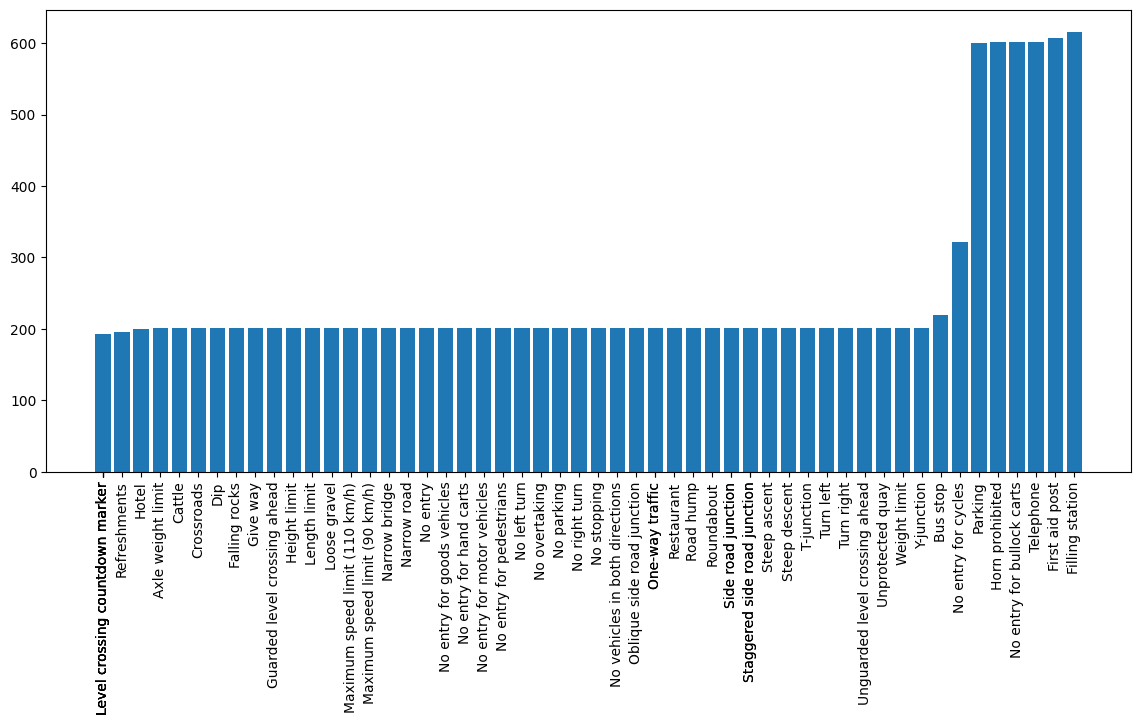

In [4]:
folders = os.listdir('/kaggle/input/indian-traffic-sign-dataset/Indian-Traffic Sign-Dataset/Images')

train_number = []
class_num = []
for folder in folders:
    train_files = os.listdir('/kaggle/input/indian-traffic-sign-dataset/Indian-Traffic Sign-Dataset/Images' + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(df['Name'][int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(14,6))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical',fontsize=10)
plt.show()


# **Loading data**

In [5]:
IMG_SIZE = 64
images = []
labels = []
path = "/kaggle/input/indian-traffic-sign-dataset/Indian-Traffic Sign-Dataset/Images"
print(len(os.listdir(path)))
for file in os.listdir(path):
    for image in os.listdir(path+'/'+str(file)):
        img =  cv2.imread(path+'/'+file+'/'+image)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        images.append(img)
        labels.append(file)

58


In [6]:
noOfClasses = len(df)
print(noOfClasses)

59


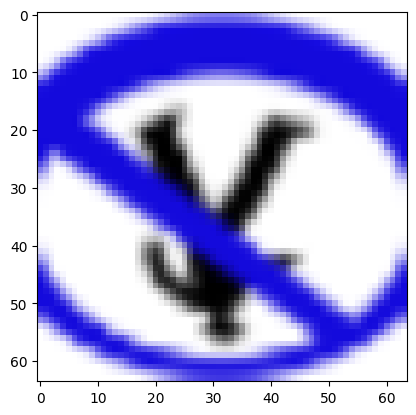

In [7]:
plt.imshow(images[0])

In [8]:
len(images)

13971

In [9]:
images = np.array(images)
labels = np.array(labels)

# **Splitting Data into Training, Testing & Validation sets**

In [10]:
X=images
Y=labels

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=0.2)

print("Train",end = "");print(X_train.shape,Y_train.shape)
print("Validation",end = "");print(X_validation.shape,Y_validation.shape)
print("Test",end = "");print(X_test.shape,Y_test.shape)

Train(8940, 64, 64, 3) (8940,)
Validation(2236, 64, 64, 3) (2236,)
Test(2795, 64, 64, 3) (2795,)


# **Visualizing Test Dataset**

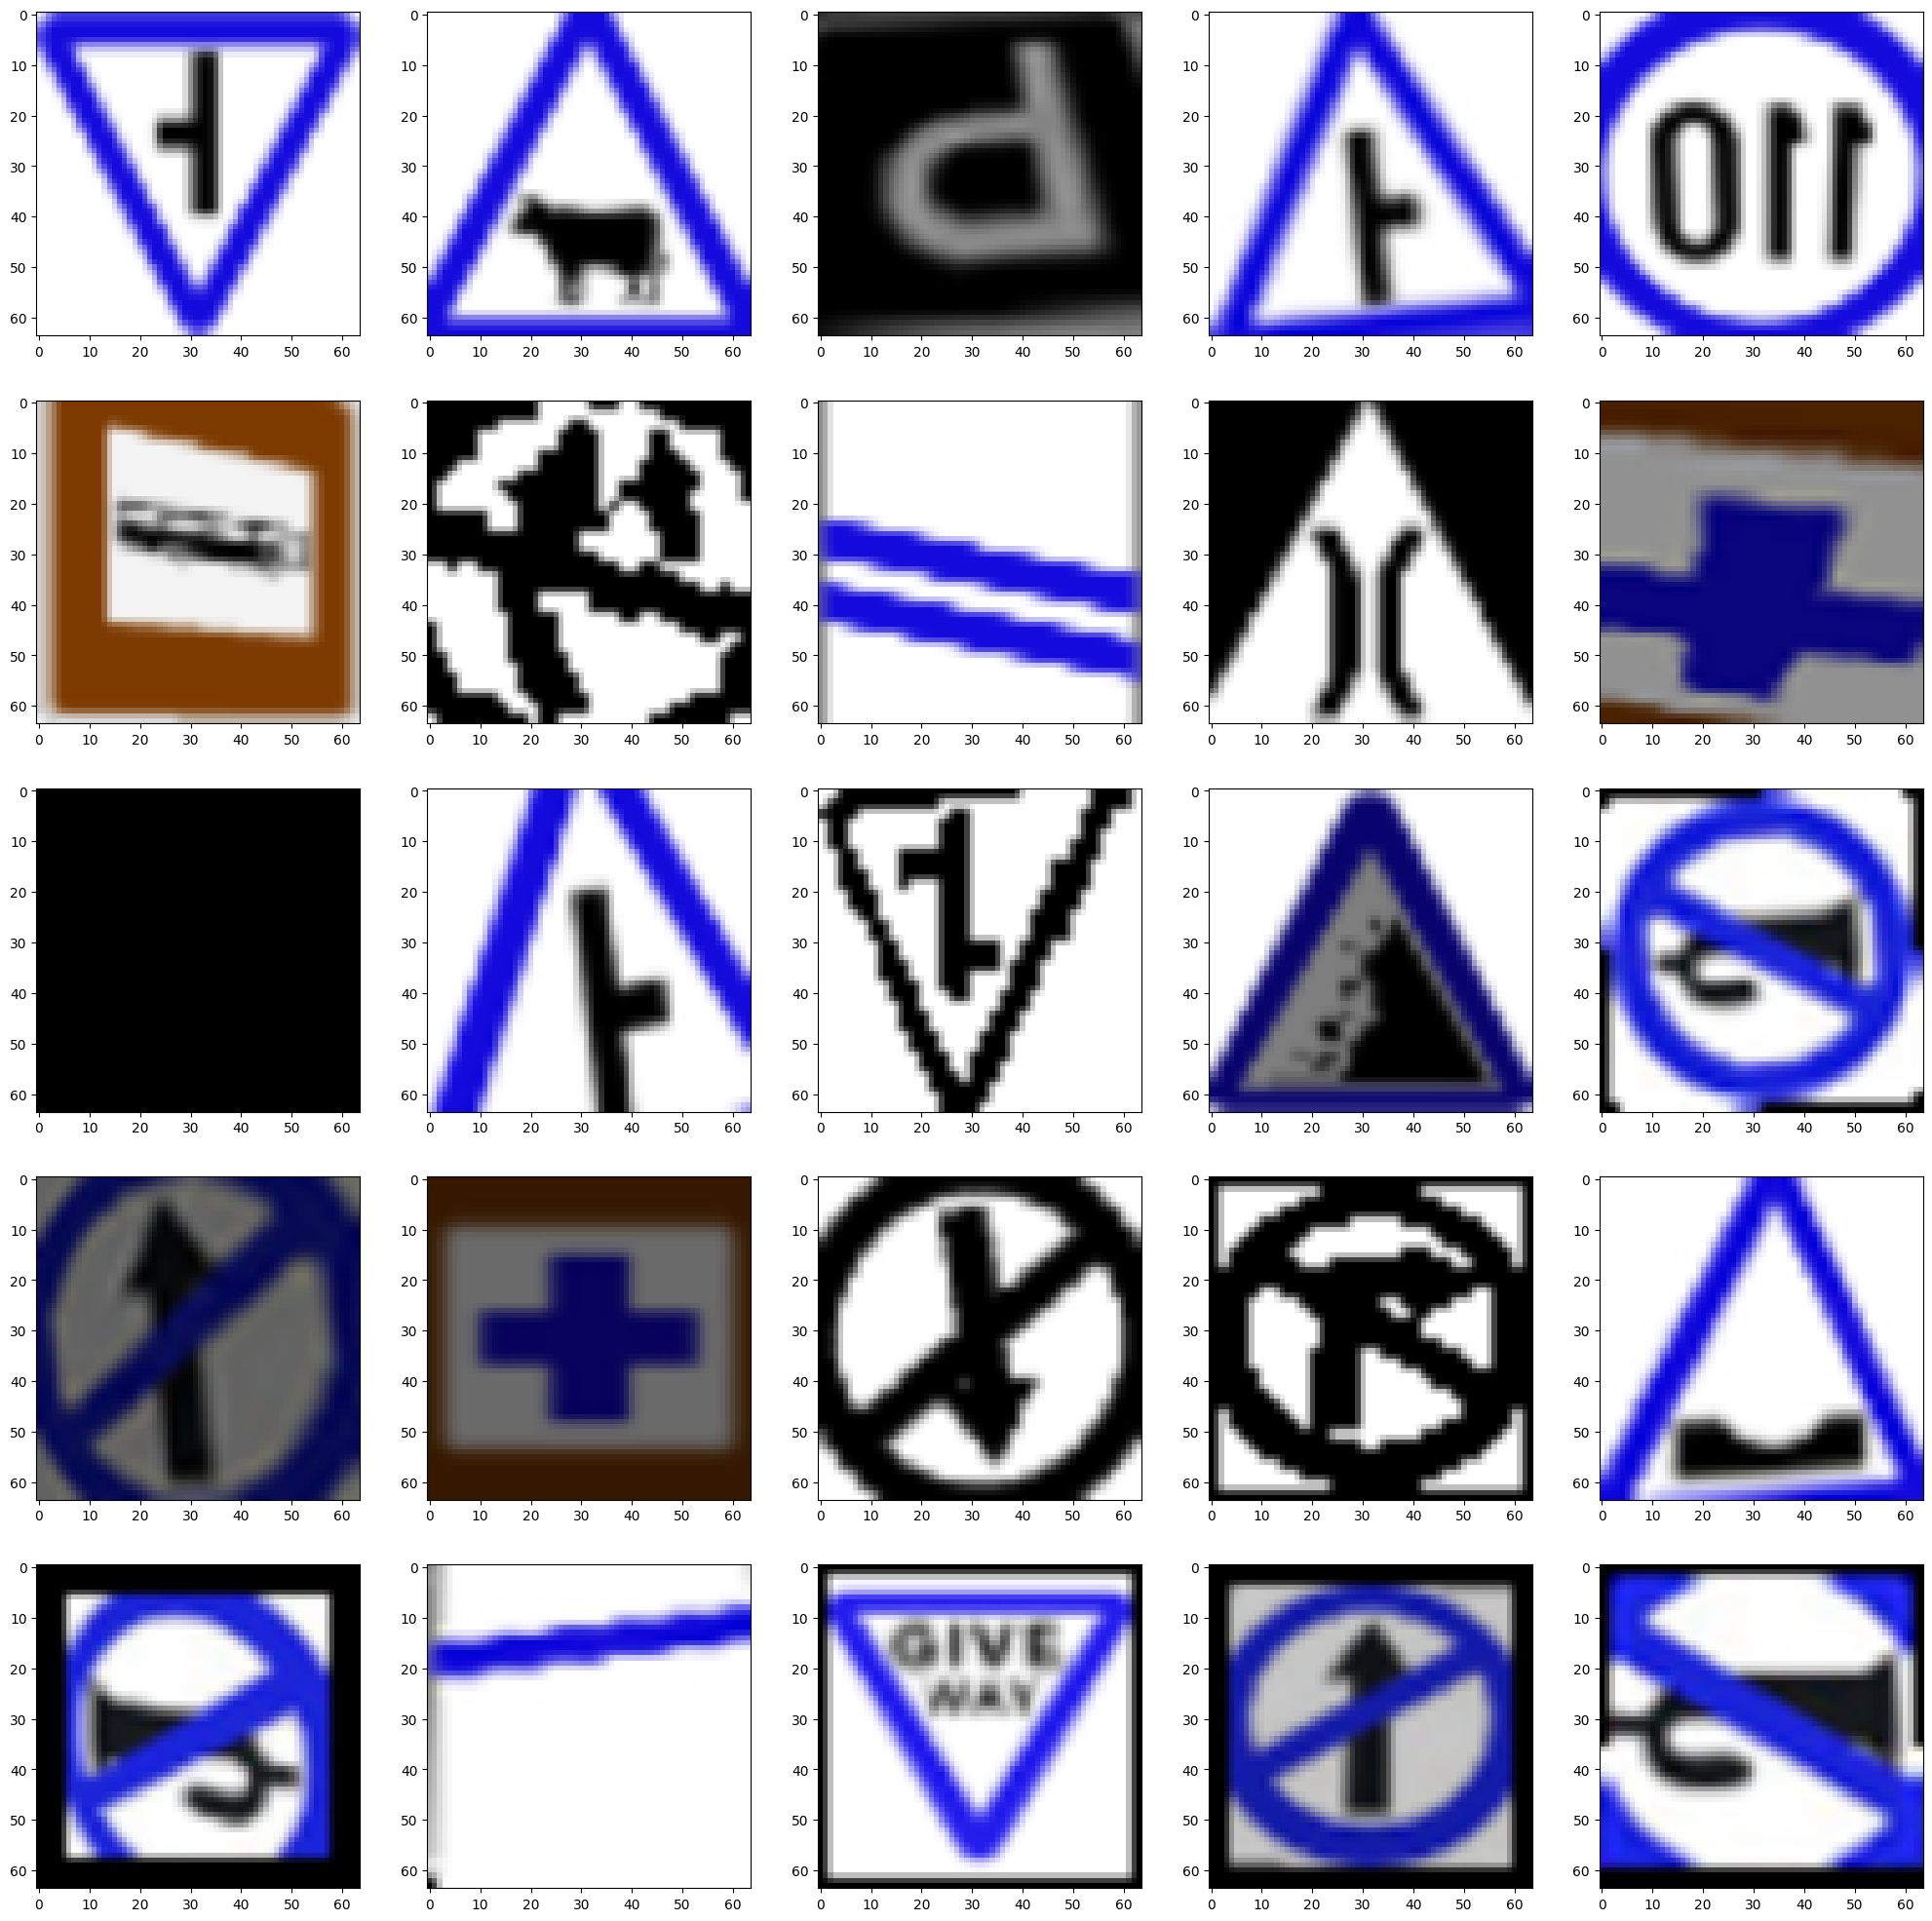

In [12]:
import random
from matplotlib.image import imread

test = X_test
imgs = Y_test

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(random.choice(X_test))
    plt.grid(visible=0)

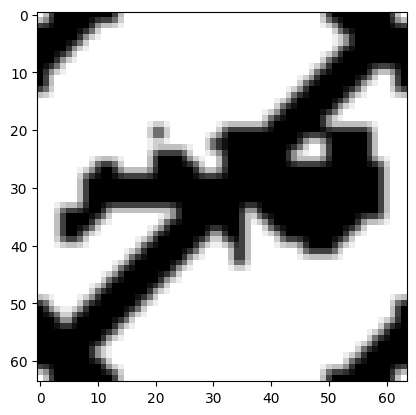

In [13]:
plt.imshow(X_train[0])

In [14]:
df.loc[int(Y_train[0])]

ClassId                             8
Name       No entry for bullock carts
Name: 8, dtype: object

# **Preprocessing Data**

In [15]:
def preprocessing(image):
    image = image/255
    return image

In [16]:
X_train=np.array(list(map(preprocessing,X_train)))  
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))

In [17]:
print("Train",end = "");print(X_train.shape,Y_train.shape)
print("Validation",end = "");print(X_validation.shape,Y_validation.shape)
print("Test",end = "");print(X_test.shape,Y_test.shape)

Train(8940, 64, 64, 3) (8940,)
Validation(2236, 64, 64, 3) (2236,)
Test(2795, 64, 64, 3) (2795,)


In [18]:
print("Train",end = "");print(X_train.shape,Y_train.shape)
print("Validation",end = "");print(X_validation.shape,Y_validation.shape)
print("Test",end = "");print(X_test.shape,Y_test.shape)

Train(8940, 64, 64, 3) (8940,)
Validation(2236, 64, 64, 3) (2236,)
Test(2795, 64, 64, 3) (2795,)


In [19]:
Y_train=np.float32(Y_train)
Y_validation=np.float32(Y_validation)
Y_test=np.float32(Y_test)

In [20]:
print("Train",end = "");print(X_train.shape,Y_train.shape)
print("Validation",end = "");print(X_validation.shape,Y_validation.shape)
print("Test",end = "");print(X_test.shape,Y_test.shape)

Train(8940, 64, 64, 3) (8940,)
Validation(2236, 64, 64, 3) (2236,)
Test(2795, 64, 64, 3) (2795,)


In [21]:
X_train[0]

array([[[1.        , 1.        , 1.        ],
        [0.74901961, 0.74901961, 0.74901961],
        [0.25098039, 0.25098039, 0.25098039],
        ...,
        [0.25098039, 0.25098039, 0.25098039],
        [0.74901961, 0.74901961, 0.74901961],
        [1.        , 1.        , 1.        ]],

       [[0.74901961, 0.74901961, 0.74901961],
        [0.56078431, 0.56078431, 0.56078431],
        [0.18823529, 0.18823529, 0.18823529],
        ...,
        [0.18823529, 0.18823529, 0.18823529],
        [0.56078431, 0.56078431, 0.56078431],
        [0.74901961, 0.74901961, 0.74901961]],

       [[0.25098039, 0.25098039, 0.25098039],
        [0.18823529, 0.18823529, 0.18823529],
        [0.0627451 , 0.0627451 , 0.0627451 ],
        ...,
        [0.0627451 , 0.0627451 , 0.0627451 ],
        [0.18823529, 0.18823529, 0.18823529],
        [0.25098039, 0.25098039, 0.25098039]],

       ...,

       [[0.25098039, 0.25098039, 0.25098039],
        [0.18823529, 0.18823529, 0.18823529],
        [0.0627451 , 0

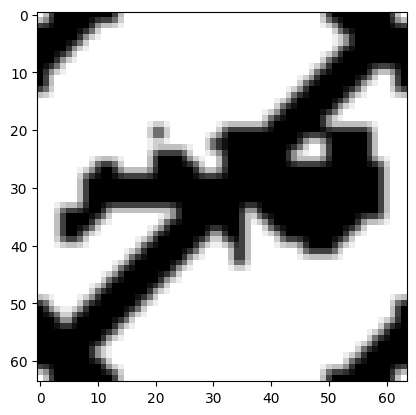

In [22]:
plt.imshow(X_train[0])

In [23]:
Y_train[0]

8.0

# **Creating the model**

In [24]:
def Model():
    model = Sequential()
    model.add((Conv2D(64,(5,5),input_shape=X_train.shape[1:],activation='relu')))  # ADDING MORE CONVOLUTION LAYERS = LESS FEATURES BUT CAN CAUSE ACCURACY TO INCREASE
    model.add((Conv2D(64, (5,5), activation='relu')))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.1))
    model.add((Conv2D(32, (3,3),activation='relu')))
    model.add((Conv2D(32, (3,3), activation='relu')))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.1))
    model.add(Flatten())
    model.add(Dense(500,activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(200,activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(noOfClasses,activation='softmax')) 
    model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
    return model

In [25]:
model = Model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 64)        4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 64)        102464    
                                                                 
 max_pooling2d (MaxPooling2  (None, 28, 28, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 28, 28, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        9248      
                                                        

In [26]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# **Fitting the Model**

In [27]:
history=model.fit(datagen.flow(X_train, Y_train, batch_size=32),steps_per_epoch=len(X_train)//32,epochs=32,shuffle=1,validation_data=(X_validation,Y_validation))

Epoch 1/32


2024-02-17 14:42:54.162346: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


279/279 [==============================] - 18s 43ms/step - loss: 2.9939 - accuracy: 0.2275 - val_loss: 1.6182 - val_accuracy: 0.5282
Epoch 2/32
279/279 [==============================] - 11s 38ms/step - loss: 1.4883 - accuracy: 0.5543 - val_loss: 0.9555 - val_accuracy: 0.6838
Epoch 3/32
279/279 [==============================] - 11s 39ms/step - loss: 1.0316 - accuracy: 0.6752 - val_loss: 0.6973 - val_accuracy: 0.7849
Epoch 4/32
279/279 [==============================] - 11s 38ms/step - loss: 0.8282 - accuracy: 0.7315 - val_loss: 0.5601 - val_accuracy: 0.8117
Epoch 5/32
279/279 [==============================] - 11s 38ms/step - loss: 0.6870 - accuracy: 0.7723 - val_loss: 0.5294 - val_accuracy: 0.8233
Epoch 6/32
279/279 [==============================] - 11s 39ms/step - loss: 0.6195 - accuracy: 0.7861 - val_loss: 0.5067 - val_accuracy: 0.8260
Epoch 7/32
279/279 [==============================] - 11s 39ms/step - loss: 0.5543 - accuracy: 0.8006 - val_loss: 0.4867 - val_accuracy: 0.8332
Epo

# **Evaluating The Model**

In [28]:
score =model.evaluate(X_test,Y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

Test Score: 0.321771502494812
Test Accuracy: 0.8794275522232056


# **Plotting the Training and Validation Accuracy and Loss**

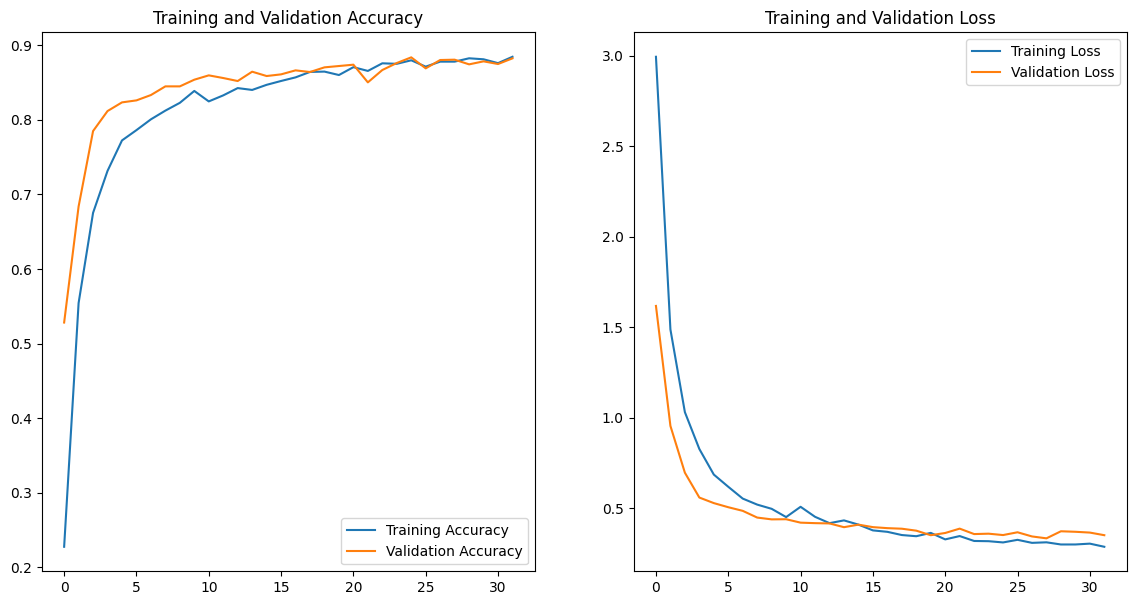

In [29]:
def plot_model_loss_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(32)

    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.savefig('Acc&Loss.png')

    plt.show()

plot_model_loss_curves(history=history)

In [30]:
Y_preds=model.predict(X_test)
Y_preds=np.argmax(Y_preds,axis=1)
Y_preds

88/88 [==============================] - 0s 4ms/step


array([23,  4, 17, ..., 33, 45, 23])

In [31]:
# model.save('final.h5')

# **Visualizing Predictions**

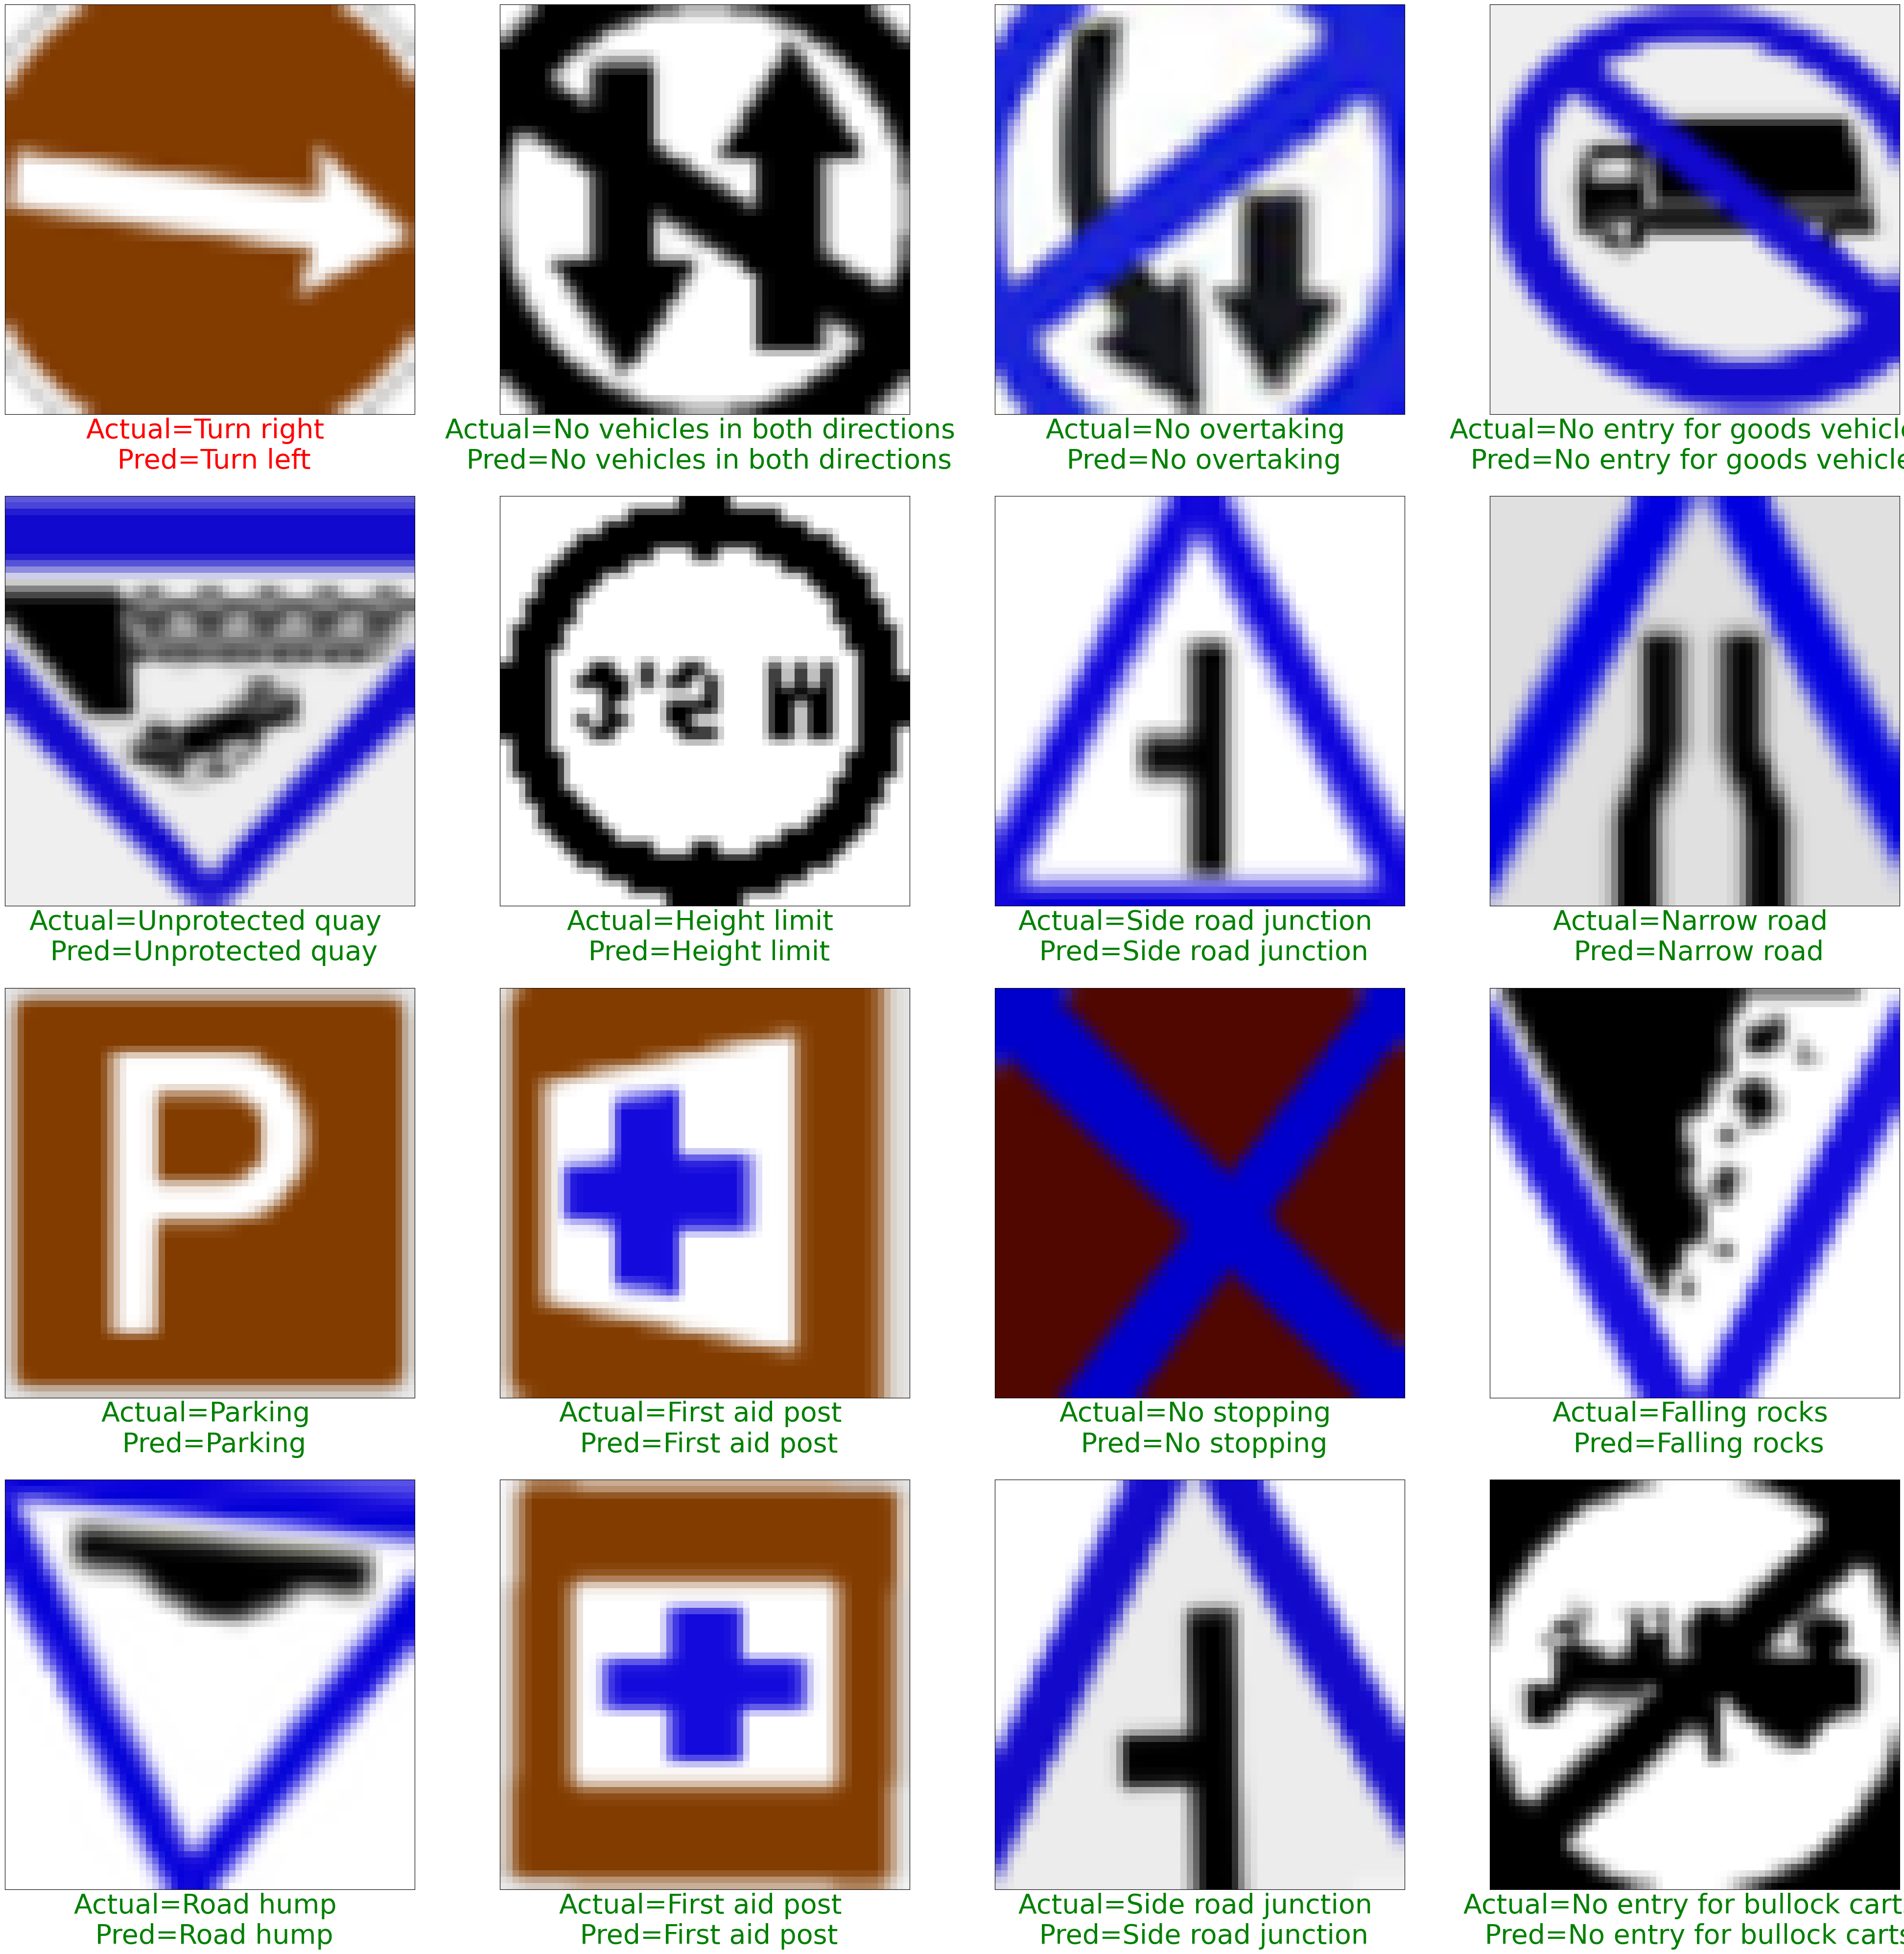

In [32]:
plt.figure(figsize = (50, 50))

start_index = 0
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = df.loc[Y_preds[i],'Name']
    actual = df.loc[Y_test[i],'Name']
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} \n Pred={}'.format(actual, prediction), color = col,fontsize = 40)
    plt.imshow(X_test[start_index + i])
plt.savefig('Actual&Pred.png')
plt.show()